In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Honors Program/honors/FinBERT

/content/drive/.shortcut-targets-by-id/15JtMaqUj0g0u5Rfig5mYfKaeRPqMjZ6o/honors/FinBERT


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('completed_data_with_topics_and_sentiments_new.xlsx')

# 获得数据集

In [ ]:
df = pd.read_excel('completed_data_en_with_sentiments.xlsx')

In [ ]:
topics = pd.read_excel('completed_data_with_topics.xlsx')

In [ ]:
df['主题标签'] = topics['主题标签']

In [ ]:
df.head()

,时间,博文内容,内容,英文内容,预测结果,主题标签
0,2017-07-13 15:16:37,"['吃', '奶粉', '孩子', '胖', '奶粉', '中有', '数倍', '母乳',...",吃奶粉的孩子的确更容易胖因为奶粉中有数倍于母乳的脂肪和蛋白质是宝宝不需要的而且会造成体重过量...,It is true that children who eat milk powder a...,negative,-1
1,2017-07-14 12:06:18,['双横臂'],双横臂,Double horizontal Arms,neutral,-1
2,2017-07-14 14:46:46,"['主属', '客户', '证件', '重复', '客户', '合并']",主属客户证件重复客户合并,Main client ID Duplicate client merge,neutral,-1
3,2017-07-14 15:11:15,['撑'],撑,brace,neutral,-1
4,2017-07-14 15:18:05,"['人要', '赚钱', '养家活口', '听', '音乐', '投资', '开车', '玩...",人要赚钱养家活口听音乐投资开车玩手机,People need to earn money to support their fam...,neutral,-1


In [ ]:
df.shape

(191460, 6)

In [ ]:
df.to_excel('completed_data_en_with_topics_and_sentiments.xlsx', index=False)

# 全部数据

In [ ]:
positive_count = df[df['预测结果'] == 'positive'].shape[0]
neutral_count = df[df['预测结果'] == 'neutral'].shape[0]
negative_count = df[df['预测结果'] == 'negative'].shape[0]
positive_count_percentage = round(((positive_count) / (positive_count + neutral_count + negative_count) * 100), 2)
neutral_count_percentage = round(((neutral_count) / (positive_count + neutral_count + negative_count) * 100), 2)
negative_count_percentage = round(((negative_count) / (positive_count + neutral_count + negative_count) * 100), 2)

print(f"正面情绪数量：{positive_count}，正面情绪百分比：{positive_count_percentage}%")
print(f"中立情绪数量：{neutral_count}，中立情绪百分比：{neutral_count_percentage}%")
print(f"负面情绪数量：{negative_count}，负面情绪百分比：{negative_count_percentage}%")

正面情绪数量：22946，正面情绪百分比：11.98%
中立情绪数量：144702，中立情绪百分比：75.58%
负面情绪数量：23812，负面情绪百分比：12.44%


In [ ]:
# 统计每个主题标签下的正面情绪数量
positive_counts_by_theme = df[df['预测结果'] == 'positive'].groupby('主题标签').size().reset_index(name='正面情绪数量')

# 统计每个主题标签下的中立情绪数量
neutral_counts_by_theme = df[df['预测结果'] == 'neutral'].groupby('主题标签').size().reset_index(name='中立情绪数量')

# 统计每个主题标签下的负面情绪数量
negative_counts_by_theme = df[df['预测结果'] == 'negative'].groupby('主题标签').size().reset_index(name='负面情绪数量')

# 将三个统计结果合并为一个 DataFrame
result_df = pd.merge(pd.merge(positive_counts_by_theme, neutral_counts_by_theme, on='主题标签', how='outer').fillna(0),
                     negative_counts_by_theme, on='主题标签', how='outer').fillna(0)

# 计算每个主题的正面情绪百分比
result_df['正面情绪百分比(%)'] = ((result_df['正面情绪数量'] / (result_df['正面情绪数量'] + result_df['中立情绪数量'] + result_df['负面情绪数量'])) * 100).round(2)
# 计算每个主题的中立情绪百分比
result_df['中立情绪百分比(%)'] = ((result_df['中立情绪数量'] / (result_df['正面情绪数量'] + result_df['中立情绪数量'] + result_df['负面情绪数量'])) * 100).round(2)
# 计算每个主题的负面情绪百分比
result_df['负面情绪百分比(%)'] = ((result_df['负面情绪数量'] / (result_df['正面情绪数量'] + result_df['中立情绪数量'] + result_df['负面情绪数量'])) * 100).round(2)

In [ ]:
selected_data = result_df[result_df['主题标签'].between(-1, 9)]

In [ ]:
labels = {
    -1: "General Market",
    0: "Medical Care",
    1: "Artificial Intelligence",
    2: "Technology",
    3: "Revenues",
    4: "Stock Indexes",
    5: "Speculators",
    6: "Past Performance",
    7: "Growth Stock",
    8: "Future Performance",
    9: "Renewable Energy"
}

selected_data['主题名称'] = selected_data['主题标签'].map(labels)

<ipython-input-8-619efb70226f>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['主题名称'] = selected_data['主题标签'].map(labels)


In [ ]:
selected_data

,主题标签,正面情绪数量,中立情绪数量,负面情绪数量,正面情绪百分比(%),中立情绪百分比(%),负面情绪百分比(%),主题名称
0,-1,13611.0,83180.0,15422.0,12.13,74.13,13.74,General Market
1,0,993.0,5687.0,808.0,13.26,75.95,10.79,Medical Care
2,1,153.0,1292.0,123.0,9.76,82.40,7.84,Artificial Intelligence
3,2,185.0,1130.0,124.0,12.86,78.53,8.62,Technology
4,3,594.0,275.0,216.0,54.75,25.35,19.91,Revenues
5,4,115.0,612.0,218.0,12.17,64.76,23.07,Stock Indexes
6,5,44.0,574.0,58.0,6.51,84.91,8.58,Speculators
7,6,95.0,424.0,94.0,15.50,69.17,15.33,Past Performance
8,7,50.0,471.0,19.0,9.26,87.22,3.52,Growth Stock
9,8,50.0,415.0,45.0,9.80,81.37,8.82,Future Performance


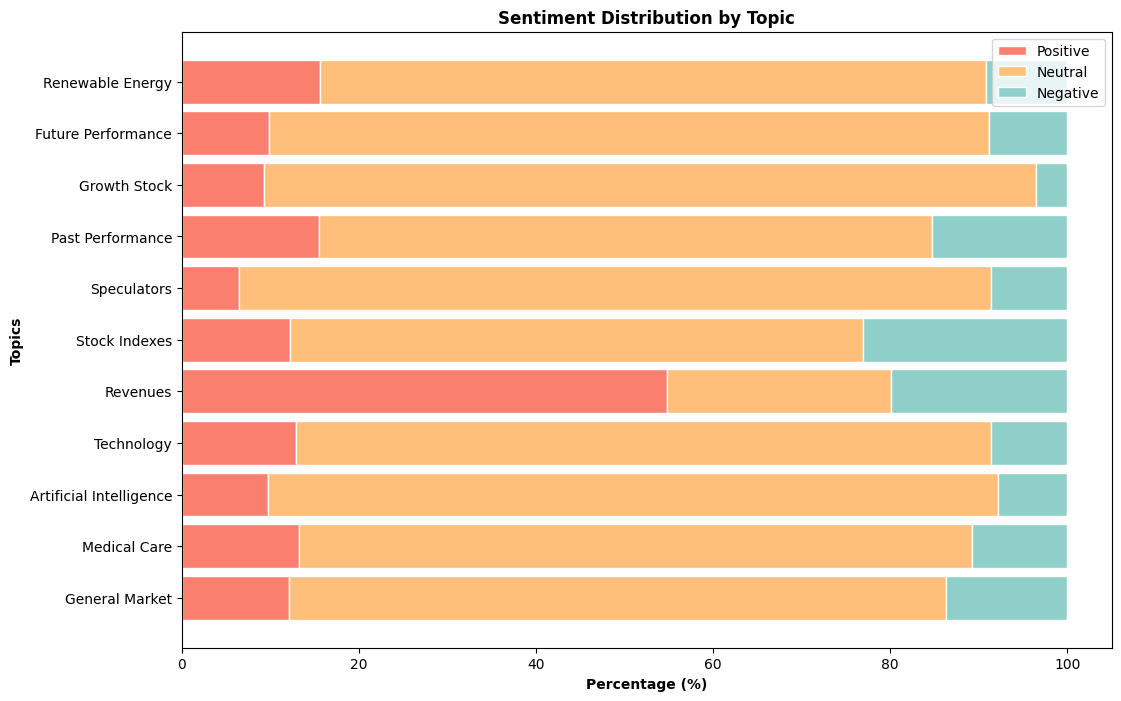

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 数据
topics = ["General Market", "Medical Care", "Artificial Intelligence", "Technology", "Revenues", "Stock Indexes",
          "Speculators", "Past Performance", "Growth Stock", "Future Performance", "Renewable Energy"]
positive_percentages = [12.13, 13.26, 9.76, 12.86, 54.75, 12.17, 6.51, 15.50, 9.26, 9.80, 15.57]
neutral_percentages = [74.13, 75.95, 82.40, 78.53, 25.35, 64.76, 84.91, 69.17, 87.22, 81.37, 75.20]
negative_percentages = [13.74, 10.79, 7.84, 8.62, 19.91, 23.07, 8.58, 15.33, 3.52, 8.82, 9.22]

# 创建画布和子图
fig, ax = plt.subplots(figsize=(12, 8))

# 设置主题颜色
colors = ['#fa7f6f', '#ffbe7a', '#8ecfc9']

# 绘制堆叠条形图
barWidth = 0.85
r = np.arange(len(topics))
plt.barh(r, positive_percentages, color=colors[0], edgecolor='white', height=barWidth, label='Positive')
plt.barh(r, neutral_percentages, left=positive_percentages, color=colors[1], edgecolor='white', height=barWidth, label='Neutral')
plt.barh(r, negative_percentages, left=np.array(positive_percentages)+np.array(neutral_percentages), color=colors[2], edgecolor='white', height=barWidth, label='Negative')

# 添加标签，标题和图例
plt.ylabel('Topics', fontweight='bold')
plt.yticks(r, topics)
plt.xlabel('Percentage (%)', fontweight='bold')
plt.title('Sentiment Distribution by Topic', fontweight='bold')
plt.legend()

# 显示图形
plt.show()

# 分时段

In [ ]:
df['时间'] = pd.to_datetime(df['时间'].dt.date)  # 截断日期数据到日级别

In [ ]:
# 定义日期范围
earliest_date = '2017-07-13'
date_2019_12_27 = '2019-12-27'
date_2022_12_07 = '2022-12-07'
latest_date = '2023-09-24'

# 根据日期范围筛选数据
df_early = df[(df['时间'] >= earliest_date) & (df['时间'] < date_2019_12_27)]
df_mid = df[(df['时间'] >= date_2019_12_27) & (df['时间'] < date_2022_12_07)]
df_late = df[(df['时间'] >= date_2022_12_07) & (df['时间'] < latest_date)]

## 早期

In [ ]:
# df_early
positive_count = df_early[df_early['预测结果'] == 'positive'].shape[0]
neutral_count = df_early[df_early['预测结果'] == 'neutral'].shape[0]
negative_count = df_early[df_early['预测结果'] == 'negative'].shape[0]
positive_count_percentage = round(((positive_count) / (positive_count + neutral_count + negative_count) * 100), 2)
neutral_count_percentage = round(((neutral_count) / (positive_count + neutral_count + negative_count) * 100), 2)
negative_count_percentage = round(((negative_count) / (positive_count + neutral_count + negative_count) * 100), 2)

print('早期：')
print(f"正面情绪数量：{positive_count}，正面情绪百分比：{positive_count_percentage}%")
print(f"中立情绪数量：{neutral_count}，中立情绪百分比：{neutral_count_percentage}%")
print(f"负面情绪数量：{negative_count}，负面情绪百分比：{negative_count_percentage}%")

早期：
正面情绪数量：3381，正面情绪百分比：13.06%
中立情绪数量：18371，中立情绪百分比：70.94%
负面情绪数量：4143，负面情绪百分比：16.0%


In [ ]:
# df_early
positive_counts_by_theme = df_early[df_early['预测结果'] == 'positive'].groupby('主题标签').size().reset_index(name='正面情绪数量')
neutral_counts_by_theme = df_early[df_early['预测结果'] == 'neutral'].groupby('主题标签').size().reset_index(name='中立情绪数量')
negative_counts_by_theme = df_early[df_early['预测结果'] == 'negative'].groupby('主题标签').size().reset_index(name='负面情绪数量')

result_early = pd.merge(pd.merge(positive_counts_by_theme, neutral_counts_by_theme, on='主题标签', how='outer').fillna(0),
                     negative_counts_by_theme, on='主题标签', how='outer').fillna(0)

result_early['正面情绪百分比(%)'] = ((result_early['正面情绪数量'] / (result_early['正面情绪数量'] + result_early['中立情绪数量'] + result_early['负面情绪数量'])) * 100).round(2)
result_early['中立情绪百分比(%)'] = ((result_early['中立情绪数量'] / (result_early['正面情绪数量'] + result_early['中立情绪数量'] + result_early['负面情绪数量'])) * 100).round(2)
result_early['负面情绪百分比(%)'] = ((result_early['负面情绪数量'] / (result_early['正面情绪数量'] + result_early['中立情绪数量'] + result_early['负面情绪数量'])) * 100).round(2)

selected_early = result_early[result_early['主题标签'].between(-1, 9)]
selected_early

,主题标签,正面情绪数量,中立情绪数量,负面情绪数量,正面情绪百分比(%),中立情绪百分比(%),负面情绪百分比(%)
0,-1,2279.0,11058.0,2966.0,13.98,67.83,18.19
1,0,107.0,628.0,99.0,12.83,75.30,11.87
2,1,5.0,21.0,3.0,17.24,72.41,10.34
3,2,30.0,144.0,35.0,14.35,68.90,16.75
4,3,51.0,19.0,9.0,64.56,24.05,11.39
5,4,38.0,102.0,54.0,19.59,52.58,27.84
6,5,5.0,22.0,3.0,16.67,73.33,10.00
7,6,4.0,46.0,10.0,6.67,76.67,16.67
8,7,1.0,12.0,1.0,7.14,85.71,7.14
9,8,5.0,41.0,7.0,9.43,77.36,13.21


## 中期

In [ ]:
# df_mid
positive_count = df_mid[df_mid['预测结果'] == 'positive'].shape[0]
neutral_count = df_mid[df_mid['预测结果'] == 'neutral'].shape[0]
negative_count = df_mid[df_mid['预测结果'] == 'negative'].shape[0]
positive_count_percentage = round(((positive_count) / (positive_count + neutral_count + negative_count) * 100), 2)
neutral_count_percentage = round(((neutral_count) / (positive_count + neutral_count + negative_count) * 100), 2)
negative_count_percentage = round(((negative_count) / (positive_count + neutral_count + negative_count) * 100), 2)

print('中期：')
print(f"正面情绪数量：{positive_count}，正面情绪百分比：{positive_count_percentage}%")
print(f"中立情绪数量：{neutral_count}，中立情绪百分比：{neutral_count_percentage}%")
print(f"负面情绪数量：{negative_count}，负面情绪百分比：{negative_count_percentage}%")

中期：
正面情绪数量：8148，正面情绪百分比：11.66%
中立情绪数量：52904，中立情绪百分比：75.68%
负面情绪数量：8850，负面情绪百分比：12.66%


In [ ]:
# df_mid
positive_counts_by_theme = df_mid[df_mid['预测结果'] == 'positive'].groupby('主题标签').size().reset_index(name='正面情绪数量')
neutral_counts_by_theme = df_mid[df_mid['预测结果'] == 'neutral'].groupby('主题标签').size().reset_index(name='中立情绪数量')
negative_counts_by_theme = df_mid[df_mid['预测结果'] == 'negative'].groupby('主题标签').size().reset_index(name='负面情绪数量')

result_mid = pd.merge(pd.merge(positive_counts_by_theme, neutral_counts_by_theme, on='主题标签', how='outer').fillna(0),
                     negative_counts_by_theme, on='主题标签', how='outer').fillna(0)

result_mid['正面情绪百分比(%)'] = ((result_mid['正面情绪数量'] / (result_mid['正面情绪数量'] + result_mid['中立情绪数量'] + result_mid['负面情绪数量'])) * 100).round(2)
result_mid['中立情绪百分比(%)'] = ((result_mid['中立情绪数量'] / (result_mid['正面情绪数量'] + result_mid['中立情绪数量'] + result_mid['负面情绪数量'])) * 100).round(2)
result_mid['负面情绪百分比(%)'] = ((result_mid['负面情绪数量'] / (result_mid['正面情绪数量'] + result_mid['中立情绪数量'] + result_mid['负面情绪数量'])) * 100).round(2)

selected_mid = result_mid[result_mid['主题标签'].between(-1, 9)]
selected_mid

,主题标签,正面情绪数量,中立情绪数量,负面情绪数量,正面情绪百分比(%),中立情绪百分比(%),负面情绪百分比(%)
0,-1,4678.0,27947.0,5597.0,12.24,73.12,14.64
1,0,473.0,2870.0,416.0,12.58,76.35,11.07
2,1,2.0,10.0,0.0,16.67,83.33,0.00
3,2,69.0,401.0,31.0,13.77,80.04,6.19
4,3,171.0,61.0,32.0,64.77,23.11,12.12
5,4,52.0,326.0,105.0,10.77,67.49,21.74
6,5,15.0,433.0,37.0,3.09,89.28,7.63
7,6,62.0,230.0,58.0,17.71,65.71,16.57
8,7,43.0,442.0,15.0,8.60,88.40,3.00
9,8,34.0,222.0,29.0,11.93,77.89,10.18


## 后期

In [ ]:
# df_late
positive_count = df_late[df_late['预测结果'] == 'positive'].shape[0]
neutral_count = df_late[df_late['预测结果'] == 'neutral'].shape[0]
negative_count = df_late[df_late['预测结果'] == 'negative'].shape[0]
positive_count_percentage = round(((positive_count) / (positive_count + neutral_count + negative_count) * 100), 2)
neutral_count_percentage = round(((neutral_count) / (positive_count + neutral_count + negative_count) * 100), 2)
negative_count_percentage = round(((negative_count) / (positive_count + neutral_count + negative_count) * 100), 2)

print('后期：')
print(f"正面情绪数量：{positive_count}，正面情绪百分比：{positive_count_percentage}%")
print(f"中立情绪数量：{neutral_count}，中立情绪百分比：{neutral_count_percentage}%")
print(f"负面情绪数量：{negative_count}，负面情绪百分比：{negative_count_percentage}%")

后期：
正面情绪数量：11396，正面情绪百分比：11.95%
中立情绪数量：73177，中立情绪百分比：76.73%
负面情绪数量：10799，负面情绪百分比：11.32%


In [ ]:
# df_late
positive_counts_by_theme = df_late[df_late['预测结果'] == 'positive'].groupby('主题标签').size().reset_index(name='正面情绪数量')
neutral_counts_by_theme = df_late[df_late['预测结果'] == 'neutral'].groupby('主题标签').size().reset_index(name='中立情绪数量')
negative_counts_by_theme = df_late[df_late['预测结果'] == 'negative'].groupby('主题标签').size().reset_index(name='负面情绪数量')

result_late = pd.merge(pd.merge(positive_counts_by_theme, neutral_counts_by_theme, on='主题标签', how='outer').fillna(0),
                     negative_counts_by_theme, on='主题标签', how='outer').fillna(0)

result_late['正面情绪百分比(%)'] = ((result_late['正面情绪数量'] / (result_late['正面情绪数量'] + result_late['中立情绪数量'] + result_late['负面情绪数量'])) * 100).round(2)
result_late['中立情绪百分比(%)'] = ((result_late['中立情绪数量'] / (result_late['正面情绪数量'] + result_late['中立情绪数量'] + result_late['负面情绪数量'])) * 100).round(2)
result_late['负面情绪百分比(%)'] = ((result_late['负面情绪数量'] / (result_late['正面情绪数量'] + result_late['中立情绪数量'] + result_late['负面情绪数量'])) * 100).round(2)

selected_late = result_late[result_late['主题标签'].between(-1, 9)]
selected_late

,主题标签,正面情绪数量,中立情绪数量,负面情绪数量,正面情绪百分比(%),中立情绪百分比(%),负面情绪百分比(%)
0,-1,6642.0,44018.0,6846.0,11.55,76.55,11.90
1,0,412.0,2186.0,293.0,14.25,75.61,10.13
2,1,145.0,1257.0,120.0,9.53,82.59,7.88
3,2,86.0,584.0,57.0,11.83,80.33,7.84
4,3,371.0,195.0,174.0,50.14,26.35,23.51
5,4,25.0,183.0,59.0,9.36,68.54,22.10
6,5,24.0,119.0,18.0,14.91,73.91,11.18
7,6,29.0,148.0,26.0,14.29,72.91,12.81
8,7,6.0,17.0,3.0,23.08,65.38,11.54
9,8,11.0,150.0,9.0,6.47,88.24,5.29
